# Preprocessing cell for the Pokémon Data Science Project

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx


#import missingno as msno

plt.figure(figsize=(10, 8), dpi=60)
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 60
sns.set_theme(rc={'figure.figsize':(10,8)})

<Figure size 600x480 with 0 Axes>

### Data reading

In [32]:
data = pd.read_csv("../data/PokemonPreproc.csv", index_col=None)

### About the data, preprocessed:

The dataset was extracted using the file bulbapediascrapper.py and then preprocessed using the preprocess.ipynb. The main objective of this notebook is to do a exploratory data analysis, generate graphics as well as star extracting conclusions about the dataset.

### This notebook's tasks:

1. Further data exploration
2. Visualizations

## 1. Initial definitions of functions and other values

In [33]:
COLOR_TYPES = {'Normal': '#9fa19f',
               'Fighting': '#ff8101',
               'Flying': '#81b9ef',
               'Poison': '#9142cb',
               'Ground': '#925122',
               'Rock': '#a9af82',
               'Bug': '#91a119',
               'Ghost': '#714171',
               'Steel': '#61a1b9',
               'Fire': '#e72829',
               'Water': '#2881f0',
               'Grass': '#3fa22a',
               'Electric': '#fac000',
               'Psychic': '#f0417a',
               'Ice': '#3fcdf3',
               'Dragon': '#5060e2',
               'Dark': '#624d4f',
               'Fairy': '#ef71ef'
               }

NUM_GEN = data['Generation'].max()


Let's understand the content of each file. Let's start with the training dataset

In [34]:
print("Pokémon dataset")
print(f"Number of rows: {data.shape[0]}, number of columns: {data.shape[1]}")
print(f"Column names: {data.columns}")
print(f"Number of missing values: {data.isna().sum().sum()}")

Pokémon dataset
Number of rows: 1179, number of columns: 51
Column names: Index(['DexNumber', 'Name', 'Type1', 'Type2', 'Ability1', 'Ability2',
       'HiddenAbility', 'Generation', 'Hp', 'Attack', 'Defense',
       'SpecialAttack', 'SpecialDefense', 'Speed', 'TotalStats', 'Weight',
       'Height', 'GenderProbM', 'NoGender', 'Category', 'CatchRate',
       'EggCycles', 'EggGroup1', 'EggGroup2', 'LevelingRate', 'BaseFriendship',
       'IsLegendary', 'IsMythical', 'IsUltraBeast', 'HasMega', 'EvoStage',
       'TotalEvoStages', 'PreevoName', 'DamageFromNormal',
       'DamageFromFighting', 'DamageFromFlying', 'DamageFromPoison',
       'DamageFromGround', 'DamageFromRock', 'DamageFromBug',
       'DamageFromGhost', 'DamageFromSteel', 'DamageFromFire',
       'DamageFromWater', 'DamageFromGrass', 'DamageFromElectric',
       'DamageFromPsychic', 'DamageFromIce', 'DamageFromDragon',
       'DamageFromDark', 'DamageFromFairy'],
      dtype='object')
Number of missing values: 1538


### Attribute information:

1. **DexNumber**: Number of the Pokémon for the national dex
2. **Name**: Name of the Pokémon
3. **Type**: Pokémon's typing as a list
4. **Abilities**: Pokémon's abilities as a list
5. **Generation**: The generation where it was introduced
6. **Hp**: Hp base stat
7. **Attack**: Attack base stat
8. **Defense**: Defense base stat
9. **SpecialAttack**: Special attack base stat
10. **SpecialDefense**: Special defense base stat
11. **Speed**: Speed base stat
12. **TotalStats**: Total stats (sum of the previous six stats)
13. **Weight**: Weight in kg
14. **Height**: Height in m
15. **GenderProbM**: Probability of a Pokémon of that species being male (if it has unknown gender, it will be None)
16. **Category**: Category of that Pokémon (some distinct Pokémons have the same categories, and it may vary between evolutions)
17. **CatchRate**: Capture rate of that Pokémon
18. **EggCycles**: Number of cycles (steps, the number of steps in each cycle varies among games) to hatch an egg of that Pokémon
19. **EggGroup**: Egg Group(s) of that Pokémon
20. **LevelingRate**: Class of the XP growth of that Pokémon
21. **BaseFriendship**: Base friendship of that Pokémon
22. **IsLegendary**: Denotes if it is a legendary pokemon
23. **IsLegendary**: Denotes if it is a legendary pokemon
24. **IsMythical**: Denotes if it is a mythical pokemon
25. **IsUltraBeast**: Denotes if it is an ultra beast
26. **HasMega**: Has a Mega evolution
27. **EvoStage**: Evolution Stage of that Pokémon
28. **TotalEvoStages**: Total evolution stages for that Pokémon
29
29. **DamageFrom(Type)**: Amount of damage taken for a specific attack type

In [35]:
data.describe()

,DexNumber,Generation,Hp,Attack,Defense,SpecialAttack,SpecialDefense,Speed,TotalStats,Weight,...,DamageFromSteel,DamageFromFire,DamageFromWater,DamageFromGrass,DamageFromElectric,DamageFromPsychic,DamageFromIce,DamageFromDragon,DamageFromDark,DamageFromFairy
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,514.177269,4.995759,70.810857,79.054283,73.186599,71.936387,71.832061,69.106022,442.075488,66.536811,...,0.995547,1.148007,1.051739,0.993215,1.038804,0.986005,1.201654,0.964801,1.058100,1.090331
std,296.629667,2.613628,26.480361,30.332601,28.983002,31.037824,27.274975,29.455352,122.726110,119.956411,...,0.514777,0.695027,0.595839,0.725956,0.632178,0.517945,0.736001,0.385199,0.454902,0.535065
min,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000,0.100000,...,0.250000,0.250000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000
25%,255.500000,3.000000,51.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,8.350000,...,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000
50%,525.000000,5.000000,70.000000,76.000000,70.000000,65.000000,70.000000,67.000000,464.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,762.500000,7.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000,525.000000,70.750000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,1025.000000,9.000000,255.000000,181.000000,230.000000,180.000000,230.000000,200.000000,1125.000000,999.900000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000


# Gráficos a hacer

- Heatmap de cantidad de Pokémon en función de sus tipos.
- Stacked bar chart de tipos de Pokémon y cantidad a lo largo de las generaciones
- Histograma de estadísticas en función del tipo del Pokémon. Estadísticas medias y cada tipo de estadística.
- Diferencias entre estadísticas ofensivas y defensivas.
- Ratio de atributos físicos y especiales
- Estadísticas mínima y máxima por tipo, y diferencia entre ellas.
- Bosque de evoluciones de Pokémons
- Histograma sobre habilidades perteneciendo a líneas evolutivas distintas (cuántas habilidades sólo pertenecen a 1 línea evolutiva, cuántas a 2 líneas evolutivas....)
- Bubbleplot o heatmap de atributos ofensivos y defensivos en general de Pokémons.

# IA a hacer:
- Predecir atributos binarios (legendario, mítico, tiene Mega, ultraente, nogender)
- Intentar predecir el leveling rate como clasificación ordinal
- PROYECTO, TIERS DE SMOGON

## Heatmap of amount of Pokémon of each type combination.

Type2     Normal  Fighting  Flying  Poison  Ground  Rock  Bug  Ghost  Steel  \
Type1                                                                         
Normal         0         3      30       0       1     0    0      2      0   
Fighting       0         0       2       2       0     0    0      2      2   
Flying         0         1       0       0       0     0    0      0      1   
Poison         2         3       3       0       4     0    1      1      0   
Ground         2         1       4       0       0     3    0      4      5   
Rock           0         1       5       3       6     0    2      0      4   
Bug            0         4      13      11       2     4    0      1     10   
Ghost          0         0       3       3       2     0    0      0      0   
Steel          0         1       2       2       1     3    0      5      0   
Fire           2         6       7       1       2     3    2      5      1   
Water          0         4       7       3      10  

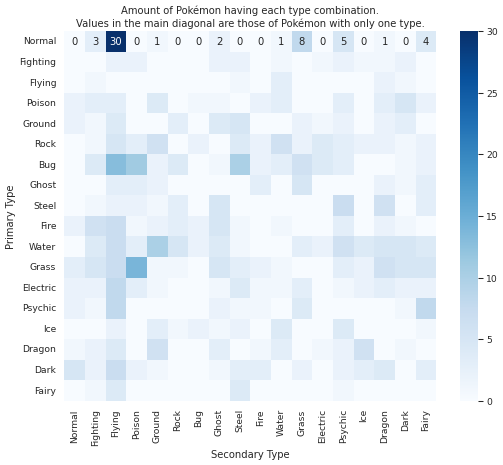

In [36]:
data[['Type1', 'Type2']]
matrix = data.groupby(['Type1','Type2']).size().unstack(fill_value=0)
matrix = matrix[COLOR_TYPES.keys()].loc[COLOR_TYPES.keys()]
print(matrix)

plt.title("Amount of Pokémon having each type combination.\nValues in the main diagonal are those of Pokémon with only one type.")
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.ylabel("Primary Type")
plt.xlabel("Secondary Type")
plt.show()


## Stacked bar chart with amount of Pokémon of each type across generations

In [37]:
# Sample multi-index series
s = pd.Series([1, 2, 3], index=pd.MultiIndex.from_tuples([(1, 'a'), (1, 'b'), (2, 'a')], names=['level1', 'level2']))

print("Original series:")
print(s)

# Convert multi-index series to DataFrame
df = s.reset_index()

print("\nConverted DataFrame:")
print(df)

Original series:
level1  level2
1       a         1
        b         2
2       a         3
dtype: int64

Converted DataFrame:
   level1 level2  0
0       1      a  1
1       1      b  2
2       2      a  3


In [38]:
d1 = data.groupby('Generation')['Type1'].value_counts().reset_index(name ='Count')
d2 = data.groupby('Generation')['Type2'].value_counts().reset_index(name ='Count')
d1['Count'] = d1['Count'] * 0.5
d2['Count'] = d2['Count'] * 0.5

sum_d = d1.copy()
sum_d = sum_d.rename({'Type1': 'Type'}, axis=1)

for gen in range(1, NUM_GEN+1):
    for poktype in COLOR_TYPES.keys():
        #print(gen, poktype)
        #print(sum_d.loc[(sum_d["Type"] == poktype) & (sum_d["Generation"] == gen), 'Count'])
        #print(d2.loc[(d2["Type2"] == poktype) & (d2["Generation"] == gen), 'Count'])
        if sum_d.loc[(sum_d["Type"] == poktype) & (sum_d["Generation"] == gen), 'Count'].empty:
            sum_d.loc[len(sum_d.index)] = [gen, poktype, 0.0]
        if not d2.loc[(d2["Type2"] == poktype) & (d2["Generation"] == gen), 'Count'].empty:
            sum_d.loc[(sum_d["Type"] == poktype) & (sum_d["Generation"] == gen), 'Count'] += d2.loc[(d2["Type2"] == poktype) & (d2["Generation"] == gen), 'Count'].values[0]
        #print(sum_d.loc[(sum_d["Type"] == poktype) & (sum_d["Generation"] == gen), 'Count'])
print(d1, d2)
print(sum_d)

     Generation     Type1  Count
0             1     Water   14.0
1             1    Normal   11.0
2             1    Poison    7.0
3             1       Bug    6.0
4             1      Fire    6.0
..          ...       ...    ...
146           9    Ground    2.0
147           9       Ice    1.5
148           9  Fighting    1.5
149           9    Flying    1.0
150           9   Psychic    1.0

[151 rows x 3 columns]      Generation     Type2  Count
0             1    Flying    9.5
1             1    Poison    9.5
2             1   Psychic    3.0
3             1    Ground    3.0
4             1     Water    2.0
..          ...       ...    ...
126           9      Fire    1.5
127           9     Grass    1.5
128           9  Electric    1.0
129           9     Fairy    1.0
130           9      Rock    0.5

[131 rows x 3 columns]
     Generation    Type  Count
0             1   Water   16.0
1             1  Normal   11.0
2             1  Poison   16.5
3             1     Bug    6.0
4    

In [39]:
wide_df = px.data.medals_wide()

fig = fig=go.Figure(px.histogram(sum_d, x="Generation", y="Count", color="Type", title="Wide-Form Input", color_discrete_map=COLOR_TYPES))
fig.update_layout(bargap=0)

fig.show()


fig = fig=go.Figure(px.histogram(sum_d, x="Generation", y="Count", color="Type", title="Wide-Form Input", color_discrete_map=COLOR_TYPES, barnorm='percent'))
fig.update_layout(bargap=0)

fig.show()



## Building evolution lines

In [40]:
G = nx.DiGraph()
print(G.is_directed())

for i in range(len(data)):
    G.add_node(data["Name"][i])                                 # Add Pokémon's name to the graph
    if data["PreevoName"][i] != "No Preevolution":
        G.add_edge(data["PreevoName"][i], data["Name"][i])
print(G)

pos = nx.spring_layout(G)

print(pos)

# Edge creation
edge_x = []
edge_y = []
print(G.edges())
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='PuBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title=dict(
              text='Node Connections',
              side='right'
            ),
            xanchor='left',
        ),
        line_width=1))


print(G)

# Color Node Points
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(f"Pokémon\'s name: {str(list(G)[node])}<br># of different evolutions: {len(adjacencies[1])}")

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Create Network graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text="<br>Pokémon evolution lines forest",
                    font=dict(
                        size=16
                    )
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Pokémon Data Science Project: <a href='https://github.com/Daalma7/PokemonDataScience'>https://github.com/Daalma7/PokemonDataScience</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.update_layout(autosize=False,
    width=1000,
    height=1000)
fig.show()

True
DiGraph with 1182 nodes and 541 edges
{'Victini': array([ 0.70382625, -0.77537018]), 'Bulbasaur': array([0.3147437 , 0.67530614]), 'Ivysaur': array([0.36151716, 0.79040891]), 'Venusaur': array([0.3586947 , 0.77732283]), 'Charmander': array([0.45135444, 0.50728625]), 'Charmeleon': array([0.52563673, 0.58650202]), 'Charizard': array([0.62367952, 0.69164294]), 'Squirtle': array([-0.51337034, -0.42483568]), 'Wartortle': array([-0.55406892, -0.45592955]), 'Blastoise': array([-0.80191439, -0.64442879]), 'Caterpie': array([-0.69233882, -0.185047  ]), 'Metapod': array([-0.85441148, -0.22743666]), 'Butterfree': array([-0.96463007, -0.25549915]), 'Weedle': array([ 0.10725138, -0.6400609 ]), 'Kakuna': array([ 0.11341367, -0.67771733]), 'Beedrill': array([ 0.15310679, -0.91742218]), 'Pidgey': array([0.31590545, 0.61438626]), 'Pidgeotto': array([0.35688818, 0.69540495]), 'Pidgeot': array([0.45369622, 0.89119011]), 'Rattata': array([-0.64987129,  0.3234632 ]), 'Alolan Rattata': array([-0.339862

## Estadísticas ofensivas/defensivas por tipo y en general
https://plotly.com/python/2D-Histogram/

Bright Red (#FF4500) - Warm tone

Orange (#FFA500) - Similar to Bright Red

Teal (#008080) - Cool tone

Blue (#0000FF) - Similar to Teal

Vibrant Yellow (#FFFF00) - Highly contrasting

Deep Purple (#800080) - Highly contrasting

In [41]:
def density_scatter_stats(stat1, stat2, colorbase, colorend, titleadd):
    fig = go.Figure()

    """
    common_template = ('Open: %{customdata[0]:.2f}<br>' +
    'High: %{customdata[1]:.2f}<br>' +
    'Low: %{customdata[2]:.2f}<br>' +
    'Adj Close: %{customdata[4]:.2f}<br>' +
    'Volume: %{customdata[5]}')
    """
    fig = px.scatter(data, x=stat1, y=stat2, marginal_x="histogram", marginal_y="histogram", hover_name="Name",color_discrete_sequence=[colorend])
    fig.update_traces(marker=dict(size=6,
                                opacity=0.8,
                                color=(data[stat1]*data[stat1] + data[stat2]*data[stat2]).apply(np.sqrt),
                                colorscale=[[0, colorbase], [1, colorend]],
                                line=dict(width=1,
                                            color=(data[stat1]*data[stat1] + data[stat2]*data[stat2]).apply(np.sqrt),
                                            colorscale=[[0, colorend], [1, colorbase]],)),
                    selector=dict(mode='markers'))

    x = data[stat1]
    y = data[stat2]
    names = data['Name']

    #print((x.max()-x.min())/5)

    fig.add_trace(go.Histogram2d(
        x=x,
        y=y,
        colorscale=[[0, colorbase], [1, colorend]],
        zmax=None,
        nbinsx=int((x.max()-x.min())/5),
        nbinsy=int((y.max()-y.min())/5),
        zauto=True,
        hoverinfo='skip'
    ))


    fig.update_layout(
        xaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
        yaxis=dict( ticks='', showgrid=False, zeroline=False, nticks=20 ),
        autosize=False,
        height=1000,
        width=1000,
        hovermode='closest',
        xaxis_title=dict(text=stat1),
        yaxis_title=dict(text=stat2),
        title=dict(
                    text=f"<br>Pokémon {titleadd} ({stat1} vs. {stat2})",
                    font=dict(
                        size=16
                    )
                ),
        title_x=0.5,
    )


    fig.show()
    print(fig.to_html(full_html=False, include_plotlyjs='cdn'))


density_scatter_stats("Speed", "Attack", "#ffffff", "#ff0000", 'Physical Offensiveness')
density_scatter_stats("Speed", "SpecialAttack", "#ffffff", "#FFA500", 'Special Offensiveness')
density_scatter_stats("Hp", "Defense", "#ffffff", "#008080", 'Physical Defensiveness')
density_scatter_stats("Hp", "SpecialDefense", "#ffffff", "#0000FF", 'Special Defensiveness')



<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="a1a1a09e-ddea-439b-ad90-f33a27feff2c" class="plotly-graph-div" style="height:1000px; width:1000px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("a1a1a09e-ddea-439b-ad90-f33a27feff2c")) {                    Plotly.newPlot(                        "a1a1a09e-ddea-439b-ad90-f33a27feff2c",                        [{"hovertemplate":"<b>%{hovertext}</b><br><br>Speed=%{x}<br>Attack=%{y}<extra></extra>","hovertext":["Victini","Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise","Caterpie","Metapod","Butterfree","Weedle","Kakuna","Beedrill","Pidgey","Pidgeotto","Pidgeot","Rattata","Alolan Ratt

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="4c04c24d-2d33-44e7-bda9-2b0bb00c11d3" class="plotly-graph-div" style="height:1000px; width:1000px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("4c04c24d-2d33-44e7-bda9-2b0bb00c11d3")) {                    Plotly.newPlot(                        "4c04c24d-2d33-44e7-bda9-2b0bb00c11d3",                        [{"hovertemplate":"<b>%{hovertext}</b><br><br>Speed=%{x}<br>SpecialAttack=%{y}<extra></extra>","hovertext":["Victini","Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise","Caterpie","Metapod","Butterfree","Weedle","Kakuna","Beedrill","Pidgey","Pidgeotto","Pidgeot","Rattata","Alol

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="23177cc1-962f-4e6b-8836-479276ea6b13" class="plotly-graph-div" style="height:1000px; width:1000px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("23177cc1-962f-4e6b-8836-479276ea6b13")) {                    Plotly.newPlot(                        "23177cc1-962f-4e6b-8836-479276ea6b13",                        [{"hovertemplate":"<b>%{hovertext}</b><br><br>Hp=%{x}<br>Defense=%{y}<extra></extra>","hovertext":["Victini","Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise","Caterpie","Metapod","Butterfree","Weedle","Kakuna","Beedrill","Pidgey","Pidgeotto","Pidgeot","Rattata","Alolan Rattat

<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="c94e0014-864f-4afd-82b2-62bb19162017" class="plotly-graph-div" style="height:1000px; width:1000px;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("c94e0014-864f-4afd-82b2-62bb19162017")) {                    Plotly.newPlot(                        "c94e0014-864f-4afd-82b2-62bb19162017",                        [{"hovertemplate":"<b>%{hovertext}</b><br><br>Hp=%{x}<br>SpecialDefense=%{y}<extra></extra>","hovertext":["Victini","Bulbasaur","Ivysaur","Venusaur","Charmander","Charmeleon","Charizard","Squirtle","Wartortle","Blastoise","Caterpie","Metapod","Butterfree","Weedle","Kakuna","Beedrill","Pidgey","Pidgeotto","Pidgeot","Rattata","Alolan

In [42]:
new_data = data.copy()
new_data['PhysicalOffensiveness'] = (new_data['Attack'] * new_data['Speed']).apply(np.sqrt)
new_data['SpecialOffensiveness'] = (new_data['SpecialAttack'] * new_data['Speed']).apply(np.sqrt)
new_data['PhysiscalDefensiveness'] = (new_data['Defense'] * new_data['Hp']).apply(np.sqrt)
new_data['SpecialDefensiveness'] = (new_data['SpecialDefense'] * new_data['Hp']).apply(np.sqrt)


print(new_data[['Name','PhysicalOffensiveness']].sort_values('PhysicalOffensiveness', ascending=False).head(20))
print(new_data[['Name','SpecialOffensiveness']].sort_values('SpecialOffensiveness', ascending=False).head(20))
print(new_data[['Name','PhysiscalDefensiveness']].sort_values('PhysiscalDefensiveness', ascending=False).head(20))
print(new_data[['Name','SpecialDefensiveness']].sort_values('SpecialDefensiveness', ascending=False).head(20))

# FALTAAAAAA FALLO EN LAS ESTADÍSTICAS DE ALGUNOS POKÉMONS CON FORMAS

                                    Name  PhysicalOffensiveness
432                  Deoxys Attack Forme             164.316767
431                  Deoxys Normal Forme             150.000000
1020                Zacian Crowned Sword             148.996644
626   Darmanitan Zen Mode(Galarian Form)             146.969385
625                  Galarian Darmanitan             146.969385
918                            Pheromosa             143.829760
1028                           Regieleki             141.421356
921                              Kartana             140.459959
1156                 Koraidon Apex Build             135.000000
832                              Diancie             132.664992
434                   Deoxys Speed Forme             130.766968
1018                           Dragapult             130.537351
974                          Barraskewda             129.336770
1021      Zamazenta Hero of Many Battles             128.685664
1019         Zacian Hero of Many Battles

# Single stats graphs

### Feature DexNumber

In [43]:
describe_feature(data, 'DexNumber')

NameError: name 'describe_feature' is not defined

Let us see the amount of Pokémon that have each amount of forms.

In [222]:
print("Number of forms / Number of Pokémon with that amount of forms")
print(data['DexNumber'].value_counts().value_counts())

Number of forms / Number of Pokémon with that amount of forms
1    914
2     87
3     11
4      8
5      4
6      1
Name: DexNumber, dtype: int64


Let us see which Pokémons does have more than 2 forms (DexNumber + Name)

In [223]:
names = data.groupby(['DexNumber'])['Name'].unique()
for i, e in zip(names.index, names):
    if len(e) > 1:
        print(i, e)

19 ['Rattata' 'Alolan Rattata']
20 ['Raticate' 'Alolan Raticate']
26 ['Raichu' 'Alolan Raichu']
27 ['Sandshrew' 'Alolan Sandshrew']
28 ['Sandslash' 'Alolan Sandslash']
37 ['Vulpix' 'Alolan Vulpix']
38 ['Ninetales' 'Alolan Ninetales']
50 ['Diglett' 'Alolan Diglett']
51 ['Dugtrio' 'Alolan Dugtrio']
52 ['Meowth' 'Alolan Meowth' 'Galarian Meowth']
53 ['Persian' 'Alolan Persian']
58 ['Growlithe' 'Hisuian Growlithe']
59 ['Arcanine' 'Hisuian Arcanine']
74 ['Geodude' 'Alolan Geodude']
75 ['Graveler' 'Alolan Graveler']
76 ['Golem' 'Alolan Golem']
77 ['Ponyta' 'Galarian Ponyta']
78 ['Rapidash' 'Galarian Rapidash']
79 ['Slowpoke' 'Galarian Slowpoke']
80 ['Slowbro' 'Galarian Slowbro']
83 ["Farfetch'd" "Galarian Farfetch'd"]
88 ['Grimer' 'Alolan Grimer']
89 ['Muk' 'Alolan Muk']
100 ['Voltorb' 'Hisuian Voltorb']
101 ['Electrode' 'Hisuian Electrode']
103 ['Exeggutor' 'Alolan Exeggutor']
105 ['Marowak' 'Alolan Marowak']
110 ['Weezing' 'Galarian Weezing']
122 ['Mr. Mime' 'Galarian Mr. Mime']
128 ['Taur

### Feature Name

In [224]:
describe_feature(data, 'Name')

- Type: object
- First rows:
0       Victini
1     Bulbasaur
2       Ivysaur
3      Venusaur
4    Charmander
Name: Name, dtype: object
- Last rows:
1174               Iron Boulder
1175                 Iron Crown
1176      Terapagos Normal Form
1177    Terapagos Terastal Form
1178                  Pecharunt
Name: Name, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 1179
- Unique value counts:
Victini                               1
Florges Orange Flower                 1
Aromatisse                            1
Spritzee                              1
Aegislash Blade Forme                 1
Aegislash Shield Forme                1
Doublade                              1
Honedge                               1
Meowstic Female                       1
Meowstic Male                         1
Espurr                                1
Furfrou Natural Form                  1
Pangoro                               1
Pancham                               1
Gogoat      

Every Pokémon and form have a different name. So this is more suitable to be the primary key rather than the DexNumber. That's funny

### Feature Type

In [225]:
describe_feature(data, 'Type')

- Type: object
- First rows:
0    ['Psychic', 'Fire']
1    ['Grass', 'Poison']
2    ['Grass', 'Poison']
3    ['Grass', 'Poison']
4               ['Fire']
Name: Type, dtype: object
- Last rows:
1174     ['Rock', 'Psychic']
1175    ['Steel', 'Psychic']
1176              ['Normal']
1177              ['Normal']
1178     ['Poison', 'Ghost']
Name: Type, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 215
- Unique value counts:
['Water']                   80
['Normal']                  80
['Grass']                   48
['Psychic']                 47
['Fire']                    39
['Electric']                35
['Fairy']                   34
['Normal', 'Flying']        30
['Fighting']                29
['Bug']                     25
['Ice']                     20
['Rock']                    19
['Ghost']                   18
['Ground']                  17
['Poison']                  16
['Dark']                    15
['Grass', 'Poison']         14
['Bug', 'Flying'

Before doing anything else, we are going to divide this feature into 2: Type1 and Type 2. If the Pokémon has only 1 type, Type2 will have a placeholder value representing "None" typing, but it will be necessary in order to not have NANs.

In [226]:
data['Type'] = remove_first_last_letter(data['Type'], ',')
data['Type1'] = get_first_element(data['Type'])
data['Type2'] = get_second_element(data['Type'])
describe_feature(data, 'Type1')
describe_feature(data, 'Type2')
data = data.drop('Type', axis=1)

- Type: object
- First rows:
0    Psychic
1      Grass
2      Grass
3      Grass
4       Fire
Name: Type1, dtype: object
- Last rows:
1174      Rock
1175     Steel
1176    Normal
1177    Normal
1178    Poison
Name: Type1, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 18
- Unique value counts:
Water       145
Normal      135
Grass       111
Bug          91
Psychic      75
Fire         75
Electric     71
Rock         64
Dark         53
Poison       48
Ground       46
Fighting     45
Fairy        44
Dragon       43
Steel        41
Ice          40
Ghost        40
Flying       12
Name: Type1, dtype: int64
- Unique values: ['Psychic' 'Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Rock' 'Ghost'
 'Dragon' 'Flying']
- Type: object
- First rows:
0      Fire
1    Poison
2    Poison
3    Poison
4      None
Name: Type2, dtype: object
- Last rows:
1174    Psychic
1175    Psychic
1176       None
1177      

Types are ordered, and it is important to consider it in any further analysis (although there are no in-game differences between being Normal,Ghost or Ghost,Normal types, the order does not matter (is much more like a set rather than a list))

### Feature Abilities

In [227]:
data['Abilities'] = remove_first_last_letter(data['Abilities'], ',')
data['Ability1'] = get_first_element(data['Abilities'])
data['Ability2'] = get_second_element(data['Abilities'])
data['HiddenAbility'] = get_third_element(data['Abilities'])
data = data.drop('Abilities', axis=1)

In [228]:
describe_feature(data, 'Ability1')

- Type: object
- First rows:
0    Victory Star
1        Overgrow
2        Overgrow
3        Overgrow
4           Blaze
Name: Ability1, dtype: object
- Last rows:
1174         Quark Drive
1175         Quark Drive
1176          Tera Shift
1177          Tera Shell
1178    Poison Puppeteer
Name: Ability1, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 244
- Unique value counts:
Levitate                 38
Swift Swim               32
Keen Eye                 28
Chlorophyll              28
Intimidate               27
Overgrow                 26
Blaze                    26
Torrent                  25
Pressure                 25
Swarm                    22
Sturdy                   20
Run Away                 19
Thick Fat                19
Poison Point             16
Shed Skin                14
Clear Body               13
Cute Charm               13
Flash Fire               13
Inner Focus              13
Oblivious                12
Insomnia                 12
Se

In [229]:
describe_feature(data, 'Ability2')

- Type: object
- First rows:
0           None
1    Chlorophyll
2    Chlorophyll
3    Chlorophyll
4    Solar Power
Name: Ability2, dtype: object
- Last rows:
1174    None
1175    None
1176    None
1177    None
1178    None
Name: Ability2, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 172
- Unique value counts:
None                   340
Sturdy                  21
Shell Armor             18
Infiltrator             18
Own Tempo               15
Ice Body                14
Sheer Force             14
Sniper                  14
Gluttony                13
Inner Focus             13
Unburden                13
Telepathy               13
Technician              12
Frisk                   12
Hydration               12
Run Away                11
Water Absorb            10
Sand Veil               10
Oblivious               10
Regenerator             10
Unnerve                 10
Moxie                   10
Flash Fire               9
Klutz                    9
Rock He

In [230]:
describe_feature(data, 'HiddenAbility')

- Type: object
- First rows:
0    None
1    None
2    None
3    None
4    None
Name: HiddenAbility, dtype: object
- Last rows:
1174    None
1175    None
1176    None
1177    None
1178    None
Name: HiddenAbility, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 128
- Unique value counts:
None                648
Regenerator          17
Weak Armor           15
Sand Force           13
Analytic             12
Unnerve              11
Sheer Force          11
Pickpocket           11
Overcoat             11
Mold Breaker         11
Rattled              10
Sap Sipper           10
Swift Swim            9
Telepathy             9
Damp                  9
Prankster             9
Moody                 8
Sand Veil             7
Technician            7
Adaptability          7
Iron Fist             7
Hustle                7
Friend Guard          7
Clear Body            6
Defiant               6
Moxie                 6
Thick Fat             6
Big Pecks             6
Own Temp

### Feature Generation

In [231]:
describe_feature(data, 'Generation')

- Type: object
- First rows:
0    V
1    I
2    I
3    I
4    I
Name: Generation, dtype: object
- Last rows:
1174    IX
1175    IX
1176    IX
1177    IX
1178    IX
Name: Generation, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 9
- Unique value counts:
V       186
I       185
III     143
IX      134
IV      123
VIII    110
II      106
VII      99
VI       93
Name: Generation, dtype: int64
- Unique values: ['V' 'I' 'II' 'III' 'IV' 'VI' 'VII' 'VIII' 'IX']


We can here do a really basic preprocessing in order to obtain the integer number from the roman numeral:

In [232]:
data['Generation'] = data['Generation'].replace(['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX'], [1, 2, 3, 4, 5, 6, 7, 8, 9])
describe_feature(data, 'Generation')

- Type: int64
- First rows:
0    5
1    1
2    1
3    1
4    1
Name: Generation, dtype: int64
- Last rows:
1174    9
1175    9
1176    9
1177    9
1178    9
Name: Generation, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 9
- Unique value counts:
5    186
1    185
3    143
9    134
4    123
8    110
2    106
7     99
6     93
Name: Generation, dtype: int64
- Min: 1
- Mean: 4.737065309584394
- Median: 5.0
- Max: 9
- Std: 2.6303844035296553


FALTA: Corregir el tema de la generación, las formas regionales no las hace bien, por tanto cambiar los "Galarian", "Alolian", etc. cada uno por su generación respectiva.

### Feature Hp

In [233]:
describe_feature(data, 'Hp')

- Type: int64
- First rows:
0    100
1     45
2     60
3     80
4     39
Name: Hp, dtype: int64
- Last rows:
1174    90
1175    90
1176    90
1177    95
1178    88
Name: Hp, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 109
- Unique value counts:
60     90
70     85
50     77
80     61
40     58
75     57
65     57
45     50
90     48
100    48
55     46
95     30
85     29
35     19
30     17
78     16
74     15
105    14
68     14
110    13
38     11
71     11
58     10
72     10
44     10
88      9
59      8
120     8
115     8
62      8
61      8
67      7
82      7
125     7
91      7
76      7
48      7
73      7
57      6
20      6
41      6
97      6
79      6
52      6
43      5
64      5
92      5
150     5
130     5
109     4
77      4
108     4
42      4
25      4
63      4
83      4
106     4
86      4
54      4
103     3
46      3
111     3
10      3
53      3
89      3
66      3
126     3
69      3
51      2
140     2
56      2
123     2
3

This feature is quite simple, just as it is, it represents the HP base state of that Pokémon. A higher value will mean higher HP stats.

### Feature Attack

In [234]:
describe_feature(data, 'Attack')

- Type: int64
- First rows:
0    100
1     49
2     62
3     82
4     52
Name: Attack, dtype: int64
- Last rows:
1174    120
1175     72
1176     65
1177     95
1178     88
Name: Attack, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 120
- Unique value counts:
100    63
65     63
80     53
85     51
60     50
75     48
70     47
55     46
50     46
90     44
95     41
120    41
45     38
40     32
30     26
115    25
105    24
110    22
35     20
130    20
125    20
92     11
135    10
48     10
20     10
25      8
38      8
140     8
73      8
82      8
52      8
64      8
63      8
53      8
72      8
160     7
83      7
69      6
98      6
62      6
131     6
84      6
78      6
112     5
29      5
68      5
150     5
81      5
58      5
47      4
117     4
61      4
96      4
101     4
123     4
89      4
67      4
76      4
41      4
56      4
66      4
77      4
107     4
103     3
87      3
108     3
59      3
71      3
127     3
86      3
57      

This feature is quite simple, just as it is, it represents the Attack base state of that Pokémon. A higher value will mean higher Attack stats.

### Feature Defense

In [235]:
describe_feature(data, 'Defense')

- Type: int64
- First rows:
0    100
1     49
2     63
3     83
4     43
Name: Defense, dtype: int64
- Last rows:
1174     80
1175    100
1176     85
1177    110
1178    160
Name: Defense, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 108
- Unique value counts:
70     81
60     72
50     68
80     61
65     58
90     54
40     51
45     50
100    49
55     47
95     43
75     39
85     36
35     32
115    22
30     20
110    19
105    17
120    16
130    15
67     13
48     13
63     10
58      9
68      8
77      8
125     8
72      8
140     8
62      8
78      8
20      7
53      7
84      6
107     6
39      6
43      6
52      6
97      5
79      5
71      5
51      5
86      5
57      5
66      5
91      5
37      4
135     4
88      4
99      4
41      4
44      4
145     4
69      4
131     4
83      4
42      4
64      4
73      4
25      4
15      4
76      4
160     3
150     3
49      3
38      3
34      3
121     3
54      3
92      3
89    

This feature is quite simple, just as it is, it represents the Defense base state of that Pokémon. A higher value will mean higher Defense stats.

### Feature SpecialAttack

In [236]:
describe_feature(data, 'SpecialAttack')

- Type: int64
- First rows:
0    100
1     65
2     80
3    100
4     60
Name: SpecialAttack, dtype: int64
- Last rows:
1174     68
1175    122
1176     65
1177    105
1178     88
Name: SpecialAttack, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 120
- Unique value counts:
40     75
60     71
50     64
65     61
55     54
45     51
80     45
70     45
95     41
100    40
35     40
85     39
30     39
90     31
75     27
125    27
105    23
120    21
110    20
25     16
130    12
53     11
135    11
61     11
20     10
115     9
83      9
150     9
81      8
63      8
112     7
62      7
74      7
98      7
58      7
59      7
145     6
29      6
54      5
92      5
91      5
44      5
73      5
97      5
68      4
48      4
10      4
109     4
87      4
57      4
43      4
114     4
15      4
69      4
86      4
79      4
72      4
140     4
56      4
131     3
77      3
37      3
103     3
47      3
42      3
137     3
71      3
127     3
78      3
94  

This feature is quite simple, just as it is, it represents the SpecialAttack base state of that Pokémon. A higher value will mean higher SpecialAttack stats.

### Feature SpecialDefense

In [237]:
describe_feature(data, 'SpecialDefense')

- Type: int64
- First rows:
0    100
1     65
2     80
3    100
4     50
Name: SpecialDefense, dtype: int64
- Last rows:
1174    108
1175    108
1176     85
1177    110
1178     88
Name: SpecialDefense, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 105
- Unique value counts:
70     73
50     70
80     66
60     64
65     61
55     60
75     59
45     52
90     52
40     51
95     42
100    40
85     40
35     29
30     28
105    21
110    18
25     16
120    16
115    14
63     11
48     10
130    10
79      9
86      8
56      8
20      7
51      7
154     7
107     7
82      7
96      6
81      6
53      6
58      6
128     6
61      6
135     6
52      6
62      6
72      5
150     5
89      5
71      5
67      5
54      5
41      5
42      5
98      4
101     4
125     4
108     4
83      4
37      4
73      4
69      4
140     4
87      4
77      3
66      3
116     3
38      3
43      3
97      3
64      3
49      3
31      3
44      3
117     2
92

This feature is quite simple, just as it is, it represents the SpecialDefense base state of that Pokémon. A higher value will mean higher SpecialDefense stats.

### Feature Speed

In [238]:
describe_feature(data, 'Speed')

- Type: int64
- First rows:
0    100
1     45
2     60
3     80
4     65
Name: Speed, dtype: int64
- Last rows:
1174    124
1175     98
1176     60
1177     85
1178     88
Name: Speed, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 125
- Unique value counts:
60     60
50     57
65     54
70     52
30     48
85     48
45     44
90     43
40     42
80     39
55     38
95     37
75     36
100    33
35     33
110    22
20     20
105    15
15     14
25     13
92     13
42     13
36     11
115    11
97     11
120    10
58      9
43      9
99      9
108     8
72      8
130     8
101     8
82      7
68      7
32      7
48      7
135     6
86      6
64      6
98      6
66      6
91      6
34      6
71      6
78      6
150     6
93      6
44      5
52      5
106     5
67      5
77      5
57      5
83      5
46      5
109     5
10      5
111     5
125     5
38      4
56      4
104     4
121     4
29      4
73      4
81      4
84      4
74      4
28      4
39      4


This feature is quite simple, just as it is, it represents the Speed base state of that Pokémon. A higher value will mean higher Speed stats.

### Feature TotalStats

In [239]:
describe_feature(data, 'TotalStats')

- Type: int64
- First rows:
0    600
1    318
2    405
3    625
4    309
Name: TotalStats, dtype: int64
- Last rows:
1174    590
1175    590
1176    700
1177    700
1178    600
Name: TotalStats, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 222
- Unique value counts:
600     43
580     33
500     31
570     30
490     29
300     27
405     26
485     23
530     21
420     21
495     20
680     20
480     19
510     19
475     19
525     19
330     18
310     17
700     16
305     16
410     15
520     15
505     15
460     14
470     14
540     13
320     13
290     12
455     11
335     11
280     11
440     10
350     10
325     10
340     10
590     10
535     10
430     10
550      9
450      9
515      9
250      9
270      8
355      8
303      8
555      8
390      8
245      7
315      7
400      7
210      7
275      7
425      7
385      6
360      6
308      6
465      6
370      6
265      6
295      6
476      6
435      6
534      5
240    

This feature represents the sum of all the six previous base stats for each Pokémon. This feature can be really informative about the overall power of that Pokémon.

### Feature Weight

In [240]:
describe_feature(data, 'Weight')

- Type: float64
- First rows:
0      4.0
1      6.9
2     13.0
3    100.0
4      8.5
Name: Weight, dtype: float64
- Last rows:
1174    162.5
1175    156.0
1176      6.5
1177      6.5
1178      0.3
Name: Weight, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 481
- Unique value counts:
30.0     15
0.3      15
1.0      13
6.5      13
5.0      12
8.0      12
120.0    12
28.0     12
15.0     11
4.0      11
8.5      11
12.0     10
6.0       9
0.1       9
40.0      9
19.5      9
60.0      9
18.0      9
2.0       8
25.0      8
11.0      8
3.4       8
9.0       8
10.0      8
3.5       7
11.5      7
1.5       7
2.5       7
9.5       7
35.0      7
16.0      7
12.5      7
10.5      6
105.0     6
3.0       6
17.5      6
0.8       6
1.2       6
210.0     6
5.5       6
1.8       6
20.0      6
110.0     6
55.0      6
90.0      5
230.0     5
32.0      5
79.5      5
29.5      5
0.5       5
0.9       5
32.5      5
38.0      5
2.1       5
33.0      5
7.0       5
7.5     

This is a simple feature indicating the weight (in kilograms) of the Pokémon. A higher value will mean heavier Pokémon.

### Feature Height

In [241]:
describe_feature(data, 'Height')

- Type: float64
- First rows:
0    0.4
1    0.7
2    1.0
3    2.0
4    0.6
Name: Height, dtype: float64
- Last rows:
1174    1.5
1175    1.6
1176    0.2
1177    0.2
1178    0.3
Name: Height, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 54
- Unique value counts:
0.6     102
0.3      95
0.4      82
1.0      78
0.5      77
1.2      72
1.5      62
0.8      57
0.7      53
1.1      48
0.9      43
1.6      42
1.3      42
1.4      41
0.2      40
2.0      33
1.8      33
1.7      29
1.9      23
3.0      12
2.1      12
2.5      11
0.1      11
2.2      10
2.4       7
2.3       7
3.5       5
2.8       4
4.5       4
3.2       4
2.9       3
2.7       3
3.8       3
3.6       3
5.0       3
5.5       2
4.2       2
9.2       2
5.4       2
5.2       2
4.0       2
3.7       1
3.3       1
7.0       1
2.6       1
6.2       1
14.5      1
5.8       1
3.9       1
3.4       1
6.5       1
8.8       1
20.0      1
12.0      1
Name: Height, dtype: int64
- Min: 0.1
- Mean: 1.20534

This is a simple feature indicating the height (in meters) of the Pokémon. A higher value will mean taller Pokémon.

### Feature GenderProbM

In [242]:
describe_feature(data, 'GenderProbM')

- Type: object
- First rows:
0        -
1    0.875
2    0.875
3    0.875
4    0.875
Name: GenderProbM, dtype: object
- Last rows:
1174      -
1175      -
1176    0.5
1177    0.5
1178      -
Name: GenderProbM, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 8
- Unique value counts:
0.5      709
-        193
0.875    137
0.0       56
0.25      31
1.0       30
0.75      21
0.125      2
Name: GenderProbM, dtype: int64
- Unique values: ['-' '0.875' '0.5' '0.0' '1.0' '0.25' '0.75' '0.125']


This feature indicates the proportion of male Pokémon of that species. The value '-' indicates that that Pokémon has no gender. We need to process it for use this as a continuous attribute. For this reason, we will replace those '-' values with 0.5 and add a column indicating that those Pokémon have no Gender.

In [243]:
data['NoGender'] = 0
data.loc[data['GenderProbM'] == '-', 'NoGender'] = 1
data['GenderProbM'] = data['GenderProbM'].replace(['-'], [0.5]).astype('float64')
describe_feature(data, 'GenderProbM')
describe_feature(data, 'NoGender')

- Type: float64
- First rows:
0    0.500
1    0.875
2    0.875
3    0.875
4    0.875
Name: GenderProbM, dtype: float64
- Last rows:
1174    0.5
1175    0.5
1176    0.5
1177    0.5
1178    0.5
Name: GenderProbM, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 7
- Unique value counts:
0.500    902
0.875    137
0.000     56
0.250     31
1.000     30
0.750     21
0.125      2
Name: GenderProbM, dtype: int64
- Min: 0.0
- Mean: 0.5297921967769296
- Median: 0.5
- Max: 1.0
- Std: 0.19161192761655535
- Type: int64
- First rows:
0    1
1    0
2    0
3    0
4    0
Name: NoGender, dtype: int64
- Last rows:
1174    1
1175    1
1176    0
1177    0
1178    1
Name: NoGender, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 2
- Unique value counts:
0    986
1    193
Name: NoGender, dtype: int64
- Min: 0
- Mean: 0.1636980491942324
- Median: 0.0
- Max: 1
- Std: 0.37015836158762744


### Feature Category

In [244]:
describe_feature(data, 'Category')

- Type: object
- First rows:
0    Victory Pokémon
1       Seed Pokémon
2       Seed Pokémon
3       Seed Pokémon
4     Lizard Pokémon
Name: Category, dtype: object
- Last rows:
1174        Paradox Pokémon
1175        Paradox Pokémon
1176           Tera Pokémon
1177           Tera Pokémon
1178    Subjugation Pokémon
Name: Category, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 731
- Unique value counts:
Paradox Pokémon          22
Mouse Pokémon            13
Single Bloom Pokémon     10
Fox Pokémon               9
Dragon Pokémon            8
Season Pokémon            8
Bagworm Pokémon           8
Balloon Pokémon           6
Poison Pin Pokémon        6
Plasma Pokémon            6
Mushroom Pokémon          6
Paleozoic Pokémon         5
Fossil Pokémon            5
Mole Pokémon              5
Puppy Pokémon             5
Flame Pokémon             5
Dancing Pokémon           5
Garden Pokémon            5
Fruit Pokémon             4
Tadpole Pokémon           4


This feature represents the Dex category of the Pokémon. We will use it as a categorical attribute.

### Feature CatchRate

In [245]:
describe_feature(data, 'CatchRate')

- Type: int64
- First rows:
0     3
1    45
2    45
3    45
4    45
Name: CatchRate, dtype: int64
- Last rows:
1174     10
1175     10
1176    255
1177    255
1178      3
Name: CatchRate, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 37
- Unique value counts:
45     351
3      111
190    109
255     95
75      87
120     77
60      68
90      54
30      35
200     21
225     19
25      18
50      15
180     15
100     14
10      13
150     10
235      8
127      8
70       6
140      6
5        6
55       4
6        4
125      3
65       3
80       3
20       3
130      2
15       2
220      2
170      2
155      1
145      1
35       1
160      1
205      1
Name: CatchRate, dtype: int64
- Min: 3
- Mean: 92.69974554707379
- Median: 60.0
- Max: 255
- Std: 76.09049717636522


Thishis feature indicates the catch rate of the Pokémon. Lower values indicate lower catch rates. We will use it as it is.

### Feature EggCycles

In [246]:
describe_feature(data, 'EggCycles')

- Type: int64
- First rows:
0    120
1     20
2     20
3     20
4     20
Name: EggCycles, dtype: int64
- Last rows:
1174    50
1175    50
1176     5
1177     5
1178    20
Name: EggCycles, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 11
- Unique value counts:
20     622
15     181
120     99
25      77
40      58
10      32
30      31
50      29
35      26
80      20
5        4
Name: EggCycles, dtype: int64
- Min: 5
- Mean: 30.966921119592875
- Median: 20.0
- Max: 120
- Std: 28.975103620459258


This attribute indicates es how many cycles it takes for a Pokémon to hatch from an egg. Lower values indicate faster hatching times. We will use it as it is.

### Feature EggGroup

In [247]:
describe_feature(data, 'EggGroup')

- Type: object
- First rows:
0                       -
1     ['Monster' 'Grass']
2     ['Monster' 'Grass']
3     ['Monster' 'Grass']
4    ['Monster' 'Dragon']
Name: EggGroup, dtype: object
- Last rows:
1174    -
1175    -
1176    -
1177    -
1178    -
Name: EggGroup, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 67
- Unique value counts:
['Field']                     221
-                             189
['Bug']                        75
['Mineral']                    63
['Flying']                     57
['Amorphous']                  49
['Human-Like']                 44
['Grass']                      40
['Fairy']                      36
['Water 1' 'Field']            27
['Water 2']                    27
['Monster' 'Dragon']           20
['Water 1']                    19
['Water 3']                    19
['Monster']                    19
['Monster' 'Water 1']          18
['Field' 'Fairy']              16
['Field' 'Human-Like']         14
['Dragon']    

We will process it like the types feature. Apart from it, there are several Pokémon whose egg group is non existent (Pokémon that cannot breed, or with "No Eggs Discovered" egg group), so we will substitue them.

In [248]:
data['EggGroup'] = remove_first_last_letter(data['EggGroup'], '')
data['EggGroup1'] = get_first_element(data['EggGroup'])
data['EggGroup2'] = get_second_element(data['EggGroup'])
data.loc[data['EggGroup1'] == '', 'EggGroup1'] = 'No Eggs Discovered'
data.loc[data['EggGroup2'] == 'None', 'EggGroup2'] = 'No Egg Group'

describe_feature(data, 'EggGroup1')
describe_feature(data, 'EggGroup2')
data = data.drop('EggGroup', axis=1)

- Type: object
- First rows:
0    No Eggs Discovered
1               Monster
2               Monster
3               Monster
4               Monster
Name: EggGroup1, dtype: object
- Last rows:
1174    No Eggs Discovered
1175    No Eggs Discovered
1176    No Eggs Discovered
1177    No Eggs Discovered
1178    No Eggs Discovered
Name: EggGroup1, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 15
- Unique value counts:
Field                 281
No Eggs Discovered    189
Water 1               104
Bug                    91
Monster                85
Mineral                74
Flying                 73
Fairy                  60
Grass                  53
Amorphous              52
Human-Like             48
Water 2                31
Water 3                19
Dragon                 18
Ditto                   1
Name: EggGroup1, dtype: int64
- Unique values: ['No Eggs Discovered' 'Monster' 'Bug' 'Flying' 'Field' 'Fairy' 'Grass'
 'Water 1' 'Human-Like' 'Water 3' 'Minera

This feature needs to be processed just like the Types.

### Feature LevelingRate

In [249]:
data['LevelingRate'] = remove_last_letter(data['LevelingRate'])
describe_feature(data, 'LevelingRate')

- Type: object
- First rows:
0           Slow
1    Medium Slow
2    Medium Slow
3    Medium Slow
4    Medium Slow
Name: LevelingRate, dtype: object
- Last rows:
1174    Slow
1175    Slow
1176    Slow
1177    Slow
1178    Slow
Name: LevelingRate, dtype: object
- Number of missing values: 0
object
- Number of distinct values: 6
- Unique value counts:
Medium Fast    484
Slow           298
Medium Slow    279
Fast            71
Erratic         33
Fluctuating     14
Name: LevelingRate, dtype: int64
- Unique values: ['Slow' 'Medium Slow' 'Medium Fast' 'Fast' 'Fluctuating' 'Erratic']


These are all possible categories for the Leveling Rate

### Feature BaseFrienship

In [250]:
describe_feature(data, 'BaseFriendship')

- Type: int64
- First rows:
0    100
1     70
2     70
3     70
4     70
Name: BaseFriendship, dtype: int64
- Last rows:
1174     0
1175     0
1176    50
1177    50
1178     0
Name: BaseFriendship, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 8
- Unique value counts:
70     763
50     195
0       98
35      80
100     20
140     12
90       8
20       3
Name: BaseFriendship, dtype: int64
- Min: 0
- Mean: 59.72858354537744
- Median: 70.0
- Max: 140
- Std: 22.928862208698874


This feature indicates the base friendship of the Pokémon. Lower values indicate lower base friendship. We will use it as it is.

### Feature IsLegendary

In [251]:
describe_feature(data, 'IsLegendary')

- Type: int64
- First rows:
0    0
1    0
2    0
3    0
4    0
Name: IsLegendary, dtype: int64
- Last rows:
1174    0
1175    0
1176    1
1177    1
1178    0
Name: IsLegendary, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 2
- Unique value counts:
0    1082
1      97
Name: IsLegendary, dtype: int64
- Min: 0
- Mean: 0.08227311280746395
- Median: 0.0
- Max: 1
- Std: 0.2748969679773158


This feature indicates wether the Pokémon is a Legendary Pokémon (1) or not (0). We will use it as it is.

### Feature IsMythical

In [252]:
describe_feature(data, 'IsMythical')

- Type: int64
- First rows:
0    1
1    0
2    0
3    0
4    0
Name: IsMythical, dtype: int64
- Last rows:
1174    0
1175    0
1176    0
1177    0
1178    1
Name: IsMythical, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 2
- Unique value counts:
0    1145
1      34
Name: IsMythical, dtype: int64
- Min: 0
- Mean: 0.02883799830364716
- Median: 0.0
- Max: 1
- Std: 0.16742204951428044


This feature indicates wether the Pokémon is a Mythical Pokémon (1) or not (0). We will use it as it is.

### Feature IsUltraBeast

In [253]:
describe_feature(data, 'IsUltraBeast')

- Type: int64
- First rows:
0    0
1    0
2    0
3    0
4    0
Name: IsUltraBeast, dtype: int64
- Last rows:
1174    0
1175    0
1176    0
1177    0
1178    0
Name: IsUltraBeast, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 2
- Unique value counts:
0    1168
1      11
Name: IsUltraBeast, dtype: int64
- Min: 0
- Mean: 0.009329940627650551
- Median: 0.0
- Max: 1
- Std: 0.09618076259995513


This feature indicates wether the Pokémon is an Ultra Beast (1) or not (0). We will use it as it is.

### Feature HasMega

In [254]:
describe_feature(data, 'HasMega')

- Type: int64
- First rows:
0    0
1    0
2    0
3    1
4    0
Name: HasMega, dtype: int64
- Last rows:
1174    0
1175    0
1176    0
1177    0
1178    0
Name: HasMega, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 2
- Unique value counts:
0    1132
1      47
Name: HasMega, dtype: int64
- Min: 0
- Mean: 0.03986429177268872
- Median: 0.0
- Max: 1
- Std: 0.19572332930837602


This feature indicates wether the Pokémon has a Mega Evolution (1) or not (0). We will use it as it is.

### Feature EvoStage

In [255]:
describe_feature(data, 'EvoStage')

- Type: int64
- First rows:
0    1
1    1
2    2
3    3
4    1
Name: EvoStage, dtype: int64
- Last rows:
1174    1
1175    1
1176    1
1177    1
1178    1
Name: EvoStage, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 3
- Unique value counts:
1    638
2    407
3    134
Name: EvoStage, dtype: int64
- Min: 1
- Mean: 1.5725190839694656
- Median: 1.0
- Max: 3
- Std: 0.687352156241489


This feature indicates the evolution stage of the Pokémon, with possible values being 1 (first evolution stage), 2 and 3 respectively. We will use it as it is.

### Feature TotalEvoStages

In [256]:
describe_feature(data, 'TotalEvoStages')

- Type: int64
- First rows:
0    1
1    3
2    3
3    3
4    3
Name: TotalEvoStages, dtype: int64
- Last rows:
1174    1
1175    1
1176    1
1177    1
1178    1
Name: TotalEvoStages, dtype: int64
- Number of missing values: 0
int64
- Number of distinct values: 3
- Unique value counts:
2    537
3    375
1    267
Name: TotalEvoStages, dtype: int64
- Min: 1
- Mean: 2.0916030534351147
- Median: 2.0
- Max: 3
- Std: 0.732525268127781


This feature indicates the maximum amount of the evolution line which the Pokémon belongs to. A value of 1 indicates that the Pokémon has no evolutions, a value of 2 and 3 indicates that there are 2 or 3 evolutions for the Pokémon's evolution line respectively. We will use it as it is.

### Feature DamageFromNormal

In [257]:
describe_feature(data, 'DamageFromNormal')

- Type: float64
- First rows:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DamageFromNormal, dtype: float64
- Last rows:
1174    0.5
1175    0.5
1176    1.0
1177    1.0
1178    0.0
Name: DamageFromNormal, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 4
- Unique value counts:
1.00    948
0.50    147
0.00     77
0.25      7
Name: DamageFromNormal, dtype: int64
- Min: 0.0
- Mean: 0.8678965224766751
- Median: 1.0
- Max: 1.0
- Std: 0.2871208038554019


This feature indicates the damage multiplier for Normal type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromFighting

In [258]:
describe_feature(data, 'DamageFromFighting')

- Type: float64
- First rows:
0    0.5
1    0.5
2    0.5
3    0.5
4    1.0
Name: DamageFromFighting, dtype: float64
- Last rows:
1174    1.0
1175    1.0
1176    2.0
1177    2.0
1178    0.0
Name: DamageFromFighting, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 6
- Unique value counts:
1.00    467
2.00    281
0.50    271
0.00     77
0.25     59
4.00     24
Name: DamageFromFighting, dtype: int64
- Min: 0.0
- Mean: 1.0816369804919423
- Median: 1.0
- Max: 4.0
- Std: 0.7525169654003325


This feature indicates the damage multiplier for Fighting type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromFlying

In [259]:
describe_feature(data, 'DamageFromFlying')

- Type: float64
- First rows:
0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: DamageFromFlying, dtype: float64
- Last rows:
1174    0.5
1175    0.5
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromFlying, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    703
2.00    262
0.50    184
4.00     15
0.25     15
Name: DamageFromFlying, dtype: int64
- Min: 0.25
- Mean: 1.172815945716709
- Median: 1.0
- Max: 4.0
- Std: 0.5944181865711297


This feature indicates the damage multiplier for Flying type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromPoison

In [260]:
describe_feature(data, 'DamageFromPoison')

- Type: float64
- First rows:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DamageFromPoison, dtype: float64
- Last rows:
1174    0.50
1175    0.00
1176    1.00
1177    1.00
1178    0.25
Name: DamageFromPoison, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 6
- Unique value counts:
1.00    664
0.50    230
2.00    172
0.00     82
0.25     26
4.00      5
Name: DamageFromPoison, dtype: int64
- Min: 0.0
- Mean: 0.9749787955894826
- Median: 1.0
- Max: 4.0
- Std: 0.5607317515292662


This feature indicates the damage multiplier for Poison type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromGround

In [261]:
describe_feature(data, 'DamageFromGround')

- Type: float64
- First rows:
0    2.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: DamageFromGround, dtype: float64
- Last rows:
1174    2.0
1175    2.0
1176    1.0
1177    1.0
1178    2.0
Name: DamageFromGround, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 6
- Unique value counts:
1.00    578
2.00    281
0.50    153
0.00    128
4.00     33
0.25      6
Name: DamageFromGround, dtype: int64
- Min: 0.0
- Mean: 1.1450381679389312
- Median: 1.0
- Max: 4.0
- Std: 0.7833276896292724


This feature indicates the damage multiplier for Ground type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromRock

In [262]:
describe_feature(data, 'DamageFromRock')

- Type: float64
- First rows:
0    2.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: DamageFromRock, dtype: float64
- Last rows:
1174    1.0
1175    0.5
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromRock, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    669
2.00    283
0.50    189
4.00     28
0.25     10
Name: DamageFromRock, dtype: int64
- Min: 0.25
- Mean: 1.2247667514843088
- Median: 1.0
- Max: 4.0
- Std: 0.6696879964668355


This feature indicates the damage multiplier for Rock type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromBug

In [263]:
describe_feature(data, 'DamageFromBug')

- Type: float64
- First rows:
0    1.0
1    1.0
2    1.0
3    1.0
4    0.5
Name: DamageFromBug, dtype: float64
- Last rows:
1174    2.00
1175    1.00
1176    1.00
1177    1.00
1178    0.25
Name: DamageFromBug, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    513
0.50    372
2.00    202
0.25     75
4.00     17
Name: DamageFromBug, dtype: int64
- Min: 0.25
- Mean: 1.0091178965224767
- Median: 1.0
- Max: 4.0
- Std: 0.6450079181233035


This feature indicates the damage multiplier for Bug type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromGhost

In [264]:
describe_feature(data, 'DamageFromGhost')

- Type: float64
- First rows:
0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DamageFromGhost, dtype: float64
- Last rows:
1174    2.0
1175    2.0
1176    0.0
1177    0.0
1178    2.0
Name: DamageFromGhost, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.0    770
2.0    181
0.0    154
0.5     72
4.0      2
Name: DamageFromGhost, dtype: int64
- Min: 0.0
- Mean: 0.9974554707379135
- Median: 1.0
- Max: 4.0
- Std: 0.5611898939967861


This feature indicates the damage multiplier for Ghost type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromSteel

In [265]:
describe_feature(data, 'DamageFromSteel')

- Type: float64
- First rows:
0    0.5
1    1.0
2    1.0
3    1.0
4    0.5
Name: DamageFromSteel, dtype: float64
- Last rows:
1174    2.0
1175    0.5
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromSteel, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    643
0.50    356
2.00    163
0.25     11
4.00      6
Name: DamageFromSteel, dtype: int64
- Min: 0.25
- Mean: 0.9955470737913485
- Median: 1.0
- Max: 4.0
- Std: 0.5147766606047728


This feature indicates the damage multiplier for Steel type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromFire

In [266]:
describe_feature(data, 'DamageFromFire')

- Type: float64
- First rows:
0    0.5
1    2.0
2    2.0
3    2.0
4    0.5
Name: DamageFromFire, dtype: float64
- Last rows:
1174    0.5
1175    2.0
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromFire, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    540
0.50    308
2.00    276
0.25     30
4.00     25
Name: DamageFromFire, dtype: int64
- Min: 0.25
- Mean: 1.1480067854113656
- Median: 1.0
- Max: 4.0
- Std: 0.695027094502895


This feature indicates the damage multiplier for Fire type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromWater

In [267]:
describe_feature(data, 'DamageFromWater')

- Type: float64
- First rows:
0    2.0
1    0.5
2    0.5
3    0.5
4    2.0
Name: DamageFromWater, dtype: float64
- Last rows:
1174    2.0
1175    1.0
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromWater, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    637
0.50    321
2.00    187
0.25     18
4.00     16
Name: DamageFromWater, dtype: int64
- Min: 0.25
- Mean: 1.0517387616624259
- Median: 1.0
- Max: 4.0
- Std: 0.5958393770770385


This feature indicates the damage multiplier for Water type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromGrass

In [268]:
describe_feature(data, 'DamageFromGrass')

- Type: float64
- First rows:
0    0.50
1    0.25
2    0.25
3    0.25
4    0.50
Name: DamageFromGrass, dtype: float64
- Last rows:
1174    2.0
1175    0.5
1176    1.0
1177    1.0
1178    0.5
Name: DamageFromGrass, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    449
0.50    399
2.00    187
0.25    114
4.00     30
Name: DamageFromGrass, dtype: int64
- Min: 0.25
- Mean: 0.993214588634436
- Median: 1.0
- Max: 4.0
- Std: 0.7259562610528735


This feature indicates the damage multiplier for Grass type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromElectric

In [269]:
describe_feature(data, 'DamageFromElectric')

- Type: float64
- First rows:
0    1.0
1    0.5
2    0.5
3    0.5
4    1.0
Name: DamageFromElectric, dtype: float64
- Last rows:
1174    1.0
1175    1.0
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromElectric, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 6
- Unique value counts:
1.00    603
0.50    237
2.00    230
0.00     86
0.25     13
4.00     10
Name: DamageFromElectric, dtype: int64
- Min: 0.0
- Mean: 1.0388040712468194
- Median: 1.0
- Max: 4.0
- Std: 0.632178445706601


This feature indicates the damage multiplier for Electric type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromPsychic

In [270]:
describe_feature(data, 'DamageFromPsychic')

- Type: float64
- First rows:
0    0.5
1    2.0
2    2.0
3    2.0
4    1.0
Name: DamageFromPsychic, dtype: float64
- Last rows:
1174    0.50
1175    0.25
1176    1.00
1177    1.00
1178    2.00
Name: DamageFromPsychic, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 6
- Unique value counts:
1.00    771
0.50    171
2.00    142
0.00     82
0.25      8
4.00      5
Name: DamageFromPsychic, dtype: int64
- Min: 0.0
- Mean: 0.9860050890585241
- Median: 1.0
- Max: 4.0
- Std: 0.5179454350202226


This feature indicates the damage multiplier for Psychic type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromIce

In [271]:
describe_feature(data, 'DamageFromIce')

- Type: float64
- First rows:
0    0.5
1    2.0
2    2.0
3    2.0
4    0.5
Name: DamageFromIce, dtype: float64
- Last rows:
1174    1.0
1175    0.5
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromIce, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    532
0.50    303
2.00    297
4.00     34
0.25     13
Name: DamageFromIce, dtype: int64
- Min: 0.25
- Mean: 1.2016539440203562
- Median: 1.0
- Max: 4.0
- Std: 0.7360007997667888


This feature indicates the damage multiplier for Ice type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromDragon

In [272]:
describe_feature(data, 'DamageFromDragon')

- Type: float64
- First rows:
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DamageFromDragon, dtype: float64
- Last rows:
1174    1.0
1175    0.5
1176    1.0
1177    1.0
1178    1.0
Name: DamageFromDragon, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 4
- Unique value counts:
1.0    951
0.0     83
2.0     76
0.5     69
Name: DamageFromDragon, dtype: int64
- Min: 0.0
- Mean: 0.9648006785411366
- Median: 1.0
- Max: 2.0
- Std: 0.3851985885191705


This feature indicates the damage multiplier for Dragon type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromDark

In [273]:
describe_feature(data, 'DamageFromDark')

- Type: float64
- First rows:
0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DamageFromDark, dtype: float64
- Last rows:
1174    2.0
1175    2.0
1176    1.0
1177    1.0
1178    2.0
Name: DamageFromDark, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    787
0.50    209
2.00    173
0.25      8
4.00      2
Name: DamageFromDark, dtype: int64
- Min: 0.25
- Mean: 1.058100084817642
- Median: 1.0
- Max: 4.0
- Std: 0.4549017545287548


This feature indicates the damage multiplier for Dark type attacks to that Pokémon. We will use it as it is.

### Feature DamageFromFairy

In [274]:
describe_feature(data, 'DamageFromFairy')

- Type: float64
- First rows:
0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: DamageFromFairy, dtype: float64
- Last rows:
1174    1.0
1175    0.5
1176    1.0
1177    1.0
1178    0.5
Name: DamageFromFairy, dtype: float64
- Number of missing values: 0
float64
- Number of distinct values: 5
- Unique value counts:
1.00    765
0.50    214
2.00    182
4.00     12
0.25      6
Name: DamageFromFairy, dtype: int64
- Min: 0.25
- Mean: 1.0903307888040712
- Median: 1.0
- Max: 4.0
- Std: 0.5350648303327862


This feature indicates the damage multiplier for Fairy type attacks to that Pokémon. We will use it as it is.